In [436]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Загрузка и подготовка данных

Загружаем данные Росстата по предоставленным в задании ссылкам.

* [Зарплаты](https://rosstat.gov.ru/labor_market_employment_salaries)
* [Инфляция](https://уровень-инфляции.рф/%D1%82%D0%B0%D0%B1%D0%BB%D0%B8%D1%86%D1%8B-%D0%B8%D0%BD%D1%84%D0%BB%D1%8F%D1%86%D0%B8%D0%B8)

Также дополнительно подгрузим цену барреля нефти сорта Brent и курс доллара:
* [USD/RUB](https://investfunds.ru/indexes/39/)
* [BRENT](https://investfunds.ru/indexes/624/)

Приведем данные в единый удобный для работы формат


In [437]:
salaries0 = pd.read_excel(
    'zpl by field.xlsx',
    sheet_name='с 2017 г.',
    skiprows=4,
    index_col=0
    )
salaries1 = pd.read_excel(
    'zpl by field.xlsx',
    sheet_name='2000-2016 гг.',
    skiprows=2,
    index_col=0
    )

In [438]:
inflation = pd.read_excel('inflation.xlsx')
brent = pd.read_excel('brent.xlsx')
usdrub = pd.read_excel('usdrub.xlsx')

In [439]:
inflation = inflation[['Год', 'Всего']]
inflation = inflation.set_index('Год')

In [440]:
salaries1.head(5)

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Всего по экономике,2223.4,3240.4,4360.3,5498.5,6739.5,8554.9,10633.9,13593.4,17290.1,18637.5,20952.2,23369.2,26628.9,29792.0,32495.0,34030.0,36709.0
"Сельское хозяйство, охота и лесное хозяйство",985.1,1434.6,1876.4,2339.8,3015.4,3646.2,4568.7,6143.8,8474.8,9619.2,10668.1,12464.0,14129.4,15724.0,17724.0,19721.0,21755.0
"Рыболовство, рыбоводство",2845.6,3839.3,5031.3,5444.5,7084.9,10233.5,12310.8,14797.0,19498.9,22913.5,23781.9,25939.9,29201.4,32437.3,37062.0,46676.0,54927.0
Добыча полезных ископаемых,5940.2,9099.2,11080.9,13912.4,16841.7,19726.9,23145.2,28107.5,33206.1,35363.4,39895.0,45132.0,50400.6,54161.2,58959.0,63695.0,69936.0
из нее:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [441]:
salaries0.head(5)

,20171),2018,2019,2020,2021,20222),"20232), 3)"
Всего,39167.0,43724.0,47866.8,51344.0,57243.7,65338.3,73709.3
"сельское, лесное хозяйство, охота, рыболовство и рыбоводство",25671.1,28699.0,31727.6,34770.0,39436.8,46777.0,52868.3
в том числе:,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"растениеводство и животноводство, охота и предоставление соответствующих услуг в этих областях",23529.1,25820.0,28395.8,31058.0,35460.2,41993.7,47582.9
лесоводство и лесозаготовки,27616.6,32701.0,35426.2,37855.0,42151.8,48327.2,52416.3


In [442]:
salaries0.columns

Index(['20171)', 2018, 2019, 2020, 2021, '20222)', '20232), 3)'], dtype='object')

In [443]:
salaries0.rename(columns={
        '20171)': 2017,
        '20222)': 2022,
        '20232), 3)': 2023}, inplace=True)

In [444]:
salaries1.columns

Int64Index([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
            2011, 2012, 2013, 2014, 2015, 2016],
           dtype='int64')

In [445]:
salaries1.rename(columns={
        'Unnamed: 0': 'Отрасль',
        }, inplace=True)

In [446]:
#удаляем строчки с примечаниями
salaries0 = salaries0[:-3]

### Отфильтруем нужные строки и объединим фреймы
В датафреймах существенно различается разбивка по строкам, поэтому имеет смысл сначала выделить нужные, удалить, дать одинаковые имена и затем конкатенировать.

In [447]:
old = salaries1.loc[["  добыча топливно-энергетических  полезных ископаемых", "Гостиницы и рестораны", "Образование"]].T

In [448]:
#зададим общий строковый формат для годов
salaries1.columns = [str(a) for a in salaries1.columns]

In [449]:
new = salaries0.loc[["     добыча нефти и природного газа",
                     "     добыча угля", 
                     "деятельность гостиниц и предприятий общественного питания",
                     "образование"]].T

In [450]:
old.columns = ['oilgasandcoal', 'horeca', 'education']
new.columns = ['oilgas', 'coal', 'horeca', 'education']

In [451]:
old.head(5)

,oilgasandcoal,horeca,education
2000,6985.1,1640.0,1240.2
2001,10905.4,2403.6,1833.0
2002,13080.3,3039.3,2927.3
2003,16135.5,3966.7,3386.6
2004,19903.3,4737.3,4203.4


In [452]:
old = old.apply(pd.to_numeric)

In [453]:
new = new.apply(pd.to_numeric)

# за неимением данных численности работников в добыче угля и нефтегаза возьмем просто среднюю зп 
# и будем надеяться, что это недалеко от истины
new['oilgasandcoal'] = (new.coal + new.oilgas)/2
new.drop(columns=['oilgas', 'coal'], inplace=True)

In [454]:
salaries = pd.concat([old, new])

In [455]:
salaries.index

Int64Index([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
            2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
            2022, 2023],
           dtype='int64')

In [456]:
inflation.index

Int64Index([2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013,
            2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002,
            2001, 2000, 1999, 1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991],
           dtype='int64', name='Год')

In [457]:
inflation.columns = ['inflation']

In [458]:
salaries_inflation = pd.concat([salaries, inflation], axis=1)

In [459]:
salaries_inflation.inflation = salaries_inflation.inflation.apply(lambda x: 1+x/100.)

In [460]:
salaries_inflation.head(5)

,oilgasandcoal,horeca,education,inflation
2000,6985.1,1640.0,1240.2,1.2020
2001,10905.4,2403.6,1833.0,1.1858
2002,13080.3,3039.3,2927.3,1.1506
2003,16135.5,3966.7,3386.6,1.1199
2004,19903.3,4737.3,4203.4,1.1174


In [461]:
# уберем годы, не покрытые данными по зарплатам
salaries_inflation = salaries_inflation[salaries_inflation.index > 1999]

In [462]:
# создадим показатель "дефлятор", отражающий накопленную за годы инфляцию, начиная с 2000 года
# для этого перемножим показатели каждого года со сдвигом на один год (в 2000 примем индекс за 1.0)

# будем методически подходить так: чтобы привести цены, например, 2002 года, к ценам 2000 года, необходимо
# исключить накопленное влияние инфляции за весь 2000 год и за весь 2001 год. 

salaries_inflation['deflator'] = salaries_inflation.inflation.shift(fill_value=1).cumprod()

In [463]:
salaries_inflation

,oilgasandcoal,horeca,education,inflation,deflator
2000,6985.10,1640.0,1240.2,1.2020,1.000000
2001,10905.40,2403.6,1833.0,1.1858,1.202000
2002,13080.30,3039.3,2927.3,1.1506,1.425332
2003,16135.50,3966.7,3386.6,1.1199,1.639987
2004,19903.30,4737.3,4203.4,1.1174,1.836621
2005,23455.90,6033.4,5429.7,1.1091,2.052240
2006,27614.50,7521.7,6983.3,1.0900,2.276140
2007,33275.50,9339.0,8778.3,1.1187,2.480992
2008,39051.30,11536.2,11316.8,1.1328,2.775486
2009,41568.30,12469.6,13293.6,1.0880,3.144071


In [465]:
salaries_inflation.horeca.iloc[-1]/ salaries_inflation.horeca.iloc[0]

26.33646341463415

In [466]:
salaries_inflation.oilgasandcoal.iloc[-1]/ salaries_inflation.oilgasandcoal.iloc[0]


20.51633476972413

## Данные о курсе валют и цене нефти необходимо агрегировать

In [467]:
usdrub['Дата'] = pd.to_datetime(usdrub['Дата'])
brent['Дата'] = pd.to_datetime(brent['Дата'])

In [469]:
#Получим среднегодовые значения 
usdrub['USDRUB_year_avg'] = usdrub.groupby(usdrub['Дата'].dt.year)['Значение'].transform('mean')
usdrub_year = usdrub.groupby(usdrub['Дата'].dt.year)['USDRUB_year_avg'].mean()

In [470]:
usdrub_year.head(5)

Дата
2000    28.128094
2001    29.172416
2002    31.359621
2003    30.676448
2004    28.808298
Name: USDRUB_year_avg, dtype: float64

In [471]:
brent['BRENT_year_avg'] = brent.groupby(brent['Дата'].dt.year)['Значение'].transform('mean')
brent_year = brent.groupby(brent['Дата'].dt.year)['BRENT_year_avg'].mean()

In [472]:
brent_year.head(5)

Дата
2000    29.088718
2001    24.849617
2002    25.066935
2003    28.445709
2004    37.972977
Name: BRENT_year_avg, dtype: float64

In [473]:
all_data = pd.concat([salaries_inflation, brent_year, usdrub_year], axis=1)

In [474]:
all_data.head()

,oilgasandcoal,horeca,education,inflation,deflator,BRENT_year_avg,USDRUB_year_avg
2000,6985.1,1640.0,1240.2,1.2020,1.000000,29.088718,28.128094
2001,10905.4,2403.6,1833.0,1.1858,1.202000,24.849617,29.172416
2002,13080.3,3039.3,2927.3,1.1506,1.425332,25.066935,31.359621
2003,16135.5,3966.7,3386.6,1.1199,1.639987,28.445709,30.676448
2004,19903.3,4737.3,4203.4,1.1174,1.836621,37.972977,28.808298


### Визуализируем собранные данные

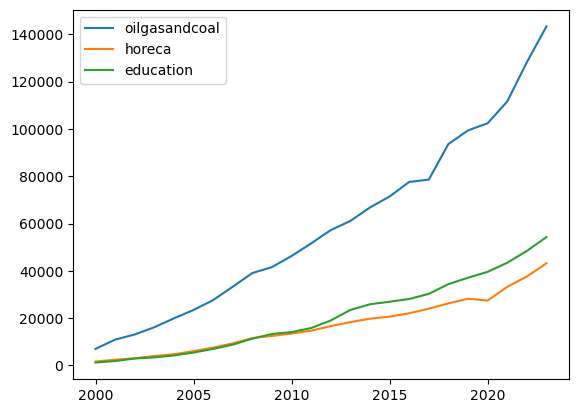

In [476]:
all_data[['oilgasandcoal','horeca','education']].plot();

Из графиков видно, что во всех выбранных отраслях средний размер оплаты растет на протяжении всего периода наблюдений. Однако данные графики недостаточно информативны, т.к. показывают зарплаты в номинальном выражении. Попробуем привести все зарплаты к ценам 2000 года, поделив на соответствующий дефлятор.

In [368]:
for col in ['oilgasandcoal','horeca','education']:
    all_data[col+"_corr"] = all_data[col] / all_data['deflator']

Выведем на график зарплаты, скорректированные на инфляцию, т.наз. реальные зарплаты. 
Из графика виден рост реальных доходов, характерный для всех рассматриваемых отраслей. Обращает на себя внимание, что реальные доходы в образовании после 2008 года стали обгонять доходы в индустрии гостеприимства и общепита.

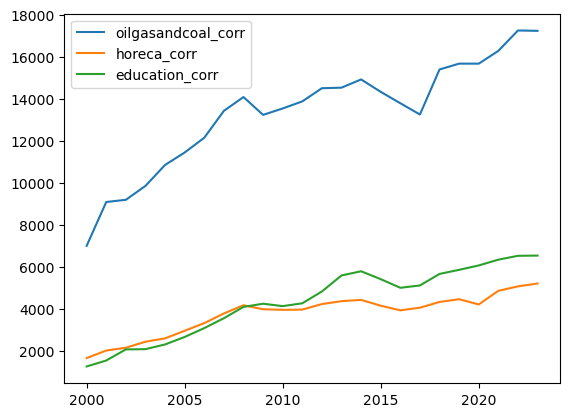

In [376]:
all_data[['oilgasandcoal_corr','horeca_corr','education_corr']].plot();

In [372]:
all_data['nrg_edu_ratio'] = all_data['oilgasandcoal'] / all_data['education']
all_data['horeca_edu_ratio'] = all_data['horeca'] / all_data['education']
all_data['nrg_horeca_ratio'] = all_data['oilgasandcoal'] / all_data['horeca']

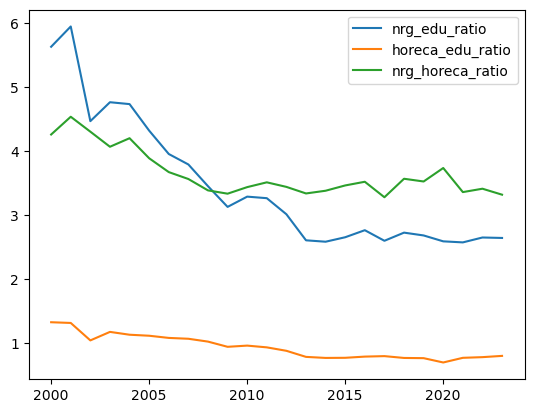

In [375]:
all_data[['nrg_edu_ratio', 'horeca_edu_ratio', 'nrg_horeca_ratio']].plot();

Рассмотрим эти соотношения немного подробнее. В начале века заработная плата в области добычи энергетических полезных ископаемых превосходила зарплаты в образовании в 6 раз. К 2023 году соотношение снизилось до 3 и менее. Соотношение зарплат в хореке и образовании близко к единице, но в начале века оно превышало 1.0, сейчас - ниже 1.0. 

In [379]:
all_data['oilgasandcoal_usd'] = all_data['oilgasandcoal'] / all_data['USDRUB_year_avg']
all_data['horeca_usd'] = all_data['horeca'] / all_data['USDRUB_year_avg']
all_data['education_usd'] = all_data['education'] / all_data['USDRUB_year_avg']

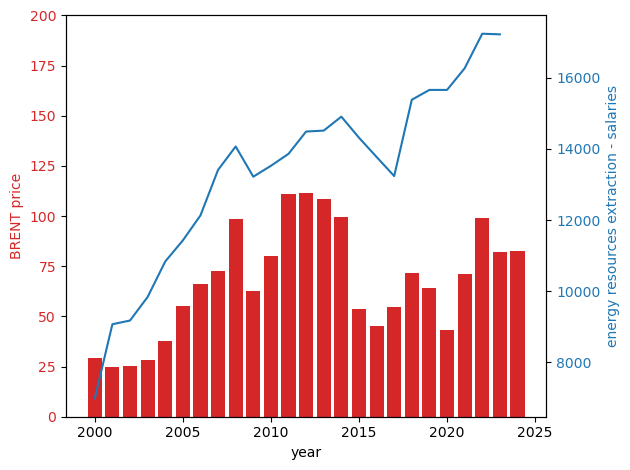

In [410]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('year')
ax1.set_ylabel('BRENT price', color=color)
ax1.set_ylim(0,200)
ax1.bar(all_data.index, all_data.BRENT_year_avg, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('energy resources extraction - salaries', color=color)  # we already handled the x-label with ax1
ax2.plot(all_data.index, all_data.oilgasandcoal_corr, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

Интересно посмотреть на то, как рост зарплат в энергетическом секторе коррелирует с ценой на нефть. Период с 2003 по 2014 год отметился самым быстрым ростом зарплат и наиболее высокими ценами на нефть. 

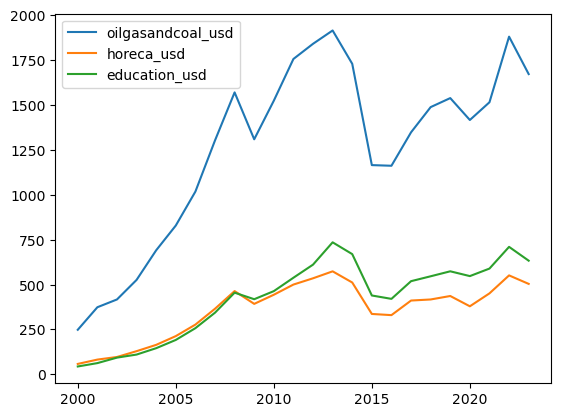

In [435]:
all_data[['oilgasandcoal_usd', 'horeca_usd', 'education_usd']].plot();

Наконец, интересно исследовать зарплаты, выраженные в более стабильной валюте, в данном случае основной мировой резервной валюте - доллларе США. Из графика очевидно, что рост реальных доходов, выраженный в валюте, прекратился после 2014 года. Такое сравнение доходов актуально в отношении покупки импортных товаров, зарубежных туристических поездок. Период с 2000 по 2014 год характеризовался крайне быстрым ростом доходов в долларовом выражении, при этом даже глубокий финансовый кризис 2008 года на этом процессе отразился не так сильно. 

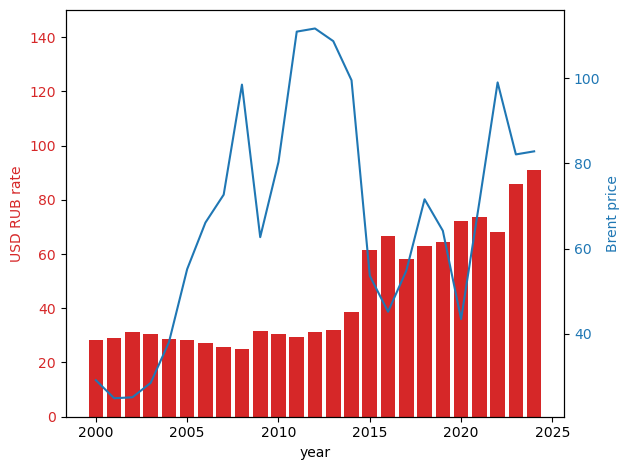

In [477]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('year')
ax1.set_ylabel('USD RUB rate', color=color)
ax1.set_ylim(0,150)
ax1.bar(all_data.index, all_data.USDRUB_year_avg, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Brent price', color=color)  # we already handled the x-label with ax1
ax2.plot(all_data.index, all_data.BRENT_year_avg, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()